In [86]:
# importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [87]:
#cargamos el archivo excel

df = pd.read_excel('C:/Users/Isaac/Desktop/IHD/EBAC DT/M19 DS/Mexico GDP.xlsx')
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [88]:
# definimos la funcion del modelo

def logistic_model(x, beta1, beta2):
    return 1 / (1 + np.exp(beta1 * (x - beta2)))

In [89]:
x_data = df['Periodo']
y_data = df['GDP']

In [90]:
initial_val = [0.01, 1970]

# Ajustar el modelo logístico a los datos
params, covariance = curve_fit(logistic_model, x_data, y_data, p0=initial_val)

# Obtener los parámetros estimados
beta1, beta2 = params
print(f"Estimación de beta1: {beta1}")
print(f"Estimación de beta2: {beta2}")

Estimación de beta1: 0.01
Estimación de beta2: 198970.00000234845


C:\Users\Isaac\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


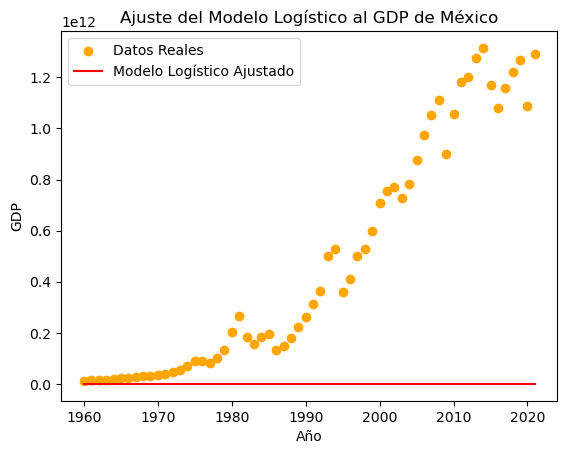

In [91]:
# Predicciones del modelo usando los parámetros ajustados
y_pred = logistic_model(x_data, *params)

# graficamos

plt.scatter(x_data, y_data, label='Datos Reales', color='orange')
plt.plot(x_data, y_pred, label='Modelo Logístico Ajustado', color='red')
plt.xlabel('Año')
plt.ylabel('GDP')
plt.legend()
plt.title('Ajuste del Modelo Logístico al GDP de México')
plt.show()

In [92]:
# Normalizar los datos dividiendo por el valor máximo de la columna GDP
max_gdp = df['GDP'].max()
df['GDP_normalized'] = df['GDP'] / max_gdp
df

,Periodo,GDP,GDP_normalized
0,1960,1.304000e+10,0.009914
1,1961,1.416000e+10,0.010765
2,1962,1.520000e+10,0.011556
3,1963,1.696000e+10,0.012894
4,1964,2.008000e+10,0.015266
...,...,...,...
57,2017,1.158913e+12,0.881067
58,2018,1.222408e+12,0.929340
59,2019,1.269404e+12,0.965069
60,2020,1.087118e+12,0.826485


In [94]:
x_data = df['Periodo']
y_data = df['GDP_normalized']

In [95]:
initial_val = [0.01, 1970]

# Ajustar el modelo logístico a los datos normalizados
params, covariance = curve_fit(logistic_model, x_data, y_data, p0=initial_val)

# Obtener los parámetros estimados
beta1, beta2 = params
print(f"Estimación de beta1: {beta1}")
print(f"Estimación de beta2: {beta2}")

Estimación de beta1: -0.13438796262567382
Estimación de beta2: 1999.3629779595412


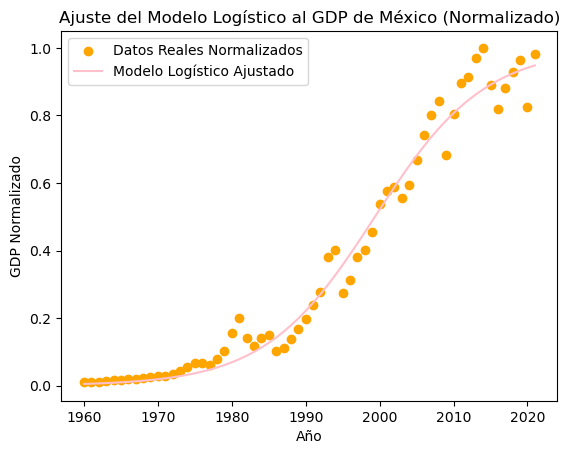

In [96]:
# Predicciones del modelo usando los parámetros ajustados
y_pred = logistic_model(x_data, *params)

# graficamos

plt.scatter(x_data, y_data, label='Datos Reales Normalizados', color='orange')
plt.plot(x_data, y_pred, label='Modelo Logístico Ajustado', color='pink')
plt.xlabel('Año')
plt.ylabel('GDP Normalizado')
plt.legend()
plt.title('Ajuste del Modelo Logístico al GDP de México (Normalizado)')
plt.show()

In [97]:
# Para evaluar la bondad del ajuste, podemos calcular el R-cuadrado:

residuals = y_data - y_pred
res1 = np.sum(residuals**2)
res2 = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (res1 / res2)
print(f"R-Cuadrado: {r_squared}")

R-Cuadrado: 0.9780236969970774


In [98]:
# Normalizamos el año 2022 y hacemos la predicción
year_2022 = 2022
predicted_gdp_2022_normalized = logistic_model(year_2022, beta1, beta2)

# Desnormalizamos la predicción
predicted_gdp_2022 = predicted_gdp_2022_normalized * max_gdp
print(f"Predicción de GDP de Mexico para el 2022: {predicted_gdp_2022}")

Predicción de GDP de Mexico para el 2022: 1255426565005.861
